In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
base_path = '/content/drive/MyDrive/dataset final'
train_path = '/content/drive/MyDrive/dataset final/test'
test_path = '/content/drive/MyDrive/dataset final/train'

os.makedirs(train_path + 'vehicles', exist_ok=True)
os.makedirs(train_path + 'non-vehicles', exist_ok=True)
os.makedirs(test_path + 'vehicles', exist_ok=True)
os.makedirs(test_path + 'non-vehicles', exist_ok=True)

In [6]:
import os

# Define the paths to your source vehicle and non-vehicle directories
src_vehicles_path = '/content/drive/MyDrive/dataset final/vehicles/'
src_non_vehicles_path = '/content/drive/MyDrive/dataset final/non-vehicles/'

# Check if the directories exist, and create them if they don't
if not os.path.exists(src_vehicles_path):
    os.makedirs(src_vehicles_path)
    print(f"Directory '{src_vehicles_path}' created.")
if not os.path.exists(src_non_vehicles_path):
    os.makedirs(src_non_vehicles_path)
    print(f"Directory '{src_non_vehicles_path}' created.")

# List all vehicle and non-vehicle images
vehicle_images = os.listdir(src_vehicles_path)
non_vehicle_images = os.listdir(src_non_vehicles_path)

# Now you can proceed with further processing or manipulation of these images


Directory '/content/drive/MyDrive/dataset final/vehicles/' created.
Directory '/content/drive/MyDrive/dataset final/non-vehicles/' created.


In [8]:
import os
import shutil

# Define the source and destination paths
src_vehicles_path = '/content/drive/MyDrive/dataset final/vehicles/'
src_non_vehicles_path = '/content/drive/MyDrive/dataset final/non-vehicles/'

dest_train_vehicles_path = '/content/drive/MyDrive/dataset final/train/vehicles/'
dest_train_non_vehicles_path = '/content/drive/MyDrive/dataset final/train/non-vehicles/'
dest_test_vehicles_path = '/content/drive/MyDrive/dataset final/test/vehicles/'
dest_test_non_vehicles_path = '/content/drive/MyDrive/dataset final/test/non-vehicles/'

#split the data into 80% for training and 20% for testing
split_ratio = 0.8

# List all vehicle and non-vehicle images
vehicle_images = os.listdir(src_vehicles_path)
non_vehicle_images = os.listdir(src_non_vehicles_path)

# Calculate the number of images for training and testing
num_train_vehicles = int(len(vehicle_images) * split_ratio)
num_train_non_vehicles = int(len(non_vehicle_images) * split_ratio)

# Copy images to the training folders
for img in vehicle_images[:num_train_vehicles]:
    shutil.copy(src_vehicles_path + img, dest_train_vehicles_path + img)

for img in non_vehicle_images[:num_train_non_vehicles]:
    shutil.copy(src_non_vehicles_path + img, dest_train_non_vehicles_path + img)

# Copy the remaining images to the testing folders
for img in vehicle_images[num_train_vehicles:]:
    shutil.copy(src_vehicles_path + img, dest_test_vehicles_path + img)

for img in non_vehicle_images[num_train_non_vehicles:]:
    shutil.copy(src_non_vehicles_path + img, dest_test_non_vehicles_path + img)


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall, F1Score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import  MobileNetV2
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras import models, layers

In [11]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Define the paths
base_path = '/content/drive/MyDrive/dataset final'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

# Create the directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Define data augmentation parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    channel_shift_range=50  # shifts the color channels
)

# Create a data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_Image = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary',
    shuffle=False  # Important: Set shuffle to False for evaluation
)

train_Image = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary'
)


Found 2122 images belonging to 2 classes.
Found 2122 images belonging to 2 classes.


In [12]:
cnn_model = Sequential()

# Add convolutional layers with max pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
cnn_model.add(Flatten())

# Add dense layers with dropout for regularization to prevent overfitting
cnn_model.add(Dense(512, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dropout(0.2))
# Output layer with sigmoid activation for binary classification
cnn_model.add(Dense(1, activation="sigmoid"))
#early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)
# Compile the model with binary crossentropy loss and Adam optimizer
optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(),Recall()])

In [14]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the CNN model
history = cnn_model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size1, callbacks=[early_stopping])


Epoch 1/10
67/67 [==============================] - 204s 3s/step - loss: 0.3239 - accuracy: 0.8728 - precision: 0.8725 - recall: 0.9410 - val_loss: 0.1087 - val_accuracy: 0.9670 - val_precision: 0.9637 - val_recall: 0.9862
Epoch 2/10
67/67 [==============================] - 82s 1s/step - loss: 0.2581 - accuracy: 0.9034 - precision: 0.9160 - recall: 0.9367 - val_loss: 0.2072 - val_accuracy: 0.9062 - val_precision: 0.8759 - val_recall: 0.9964
Epoch 3/10
67/67 [==============================] - 80s 1s/step - loss: 0.2407 - accuracy: 0.9048 - precision: 0.9104 - recall: 0.9461 - val_loss: 0.0781 - val_accuracy: 0.9680 - val_precision: 0.9573 - val_recall: 0.9949
Epoch 4/10
67/67 [==============================] - 79s 1s/step - loss: 0.1549 - accuracy: 0.9439 - precision: 0.9531 - recall: 0.9607 - val_loss: 0.1026 - val_accuracy: 0.9581 - val_precision: 0.9392 - val_recall: 1.0000
Epoch 5/10
67/67 [==============================] - 80s 1s/step - loss: 0.1271 - accuracy: 0.9533 - precision: 

67/67 [==============================] - 26s 382ms/step


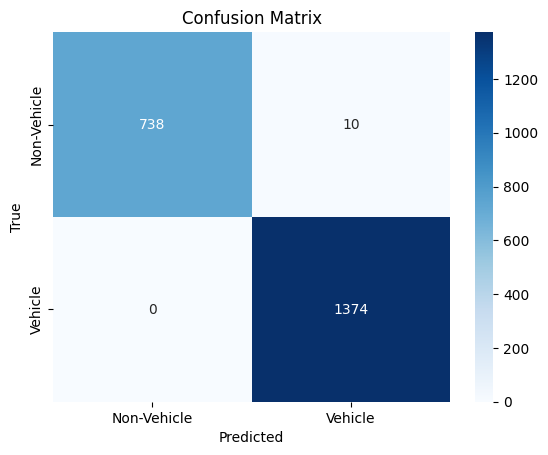

In [15]:
# Generate predictions for the test set using the evaluation generator
predictions = cnn_model.predict(test_Image)

# Convert probabilities to binary predictions
binary_predictions = np.round(predictions)

# Get true labels
true_labels = test_Image.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vehicle', 'Vehicle'], yticklabels=['Non-Vehicle', 'Vehicle'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/10
67/67 [==============================] - 83s 1s/step - loss: 0.0662 - accuracy: 0.9774 - precision: 0.9832 - recall: 0.9818 - val_loss: 0.0199 - val_accuracy: 0.9920 - val_precision: 0.9878 - val_recall: 1.0000
Epoch 2/10
67/67 [==============================] - 80s 1s/step - loss: 0.0633 - accuracy: 0.9821 - precision: 0.9827 - recall: 0.9898 - val_loss: 0.0152 - val_accuracy: 0.9962 - val_precision: 0.9942 - val_recall: 1.0000
Epoch 3/10
67/67 [==============================] - 78s 1s/step - loss: 0.0375 - accuracy: 0.9896 - precision: 0.9934 - recall: 0.9905 - val_loss: 0.0024 - val_accuracy: 0.9995 - val_precision: 0.9993 - val_recall: 1.0000
Epoch 4/10
67/67 [==============================] - 80s 1s/step - loss: 0.0435 - accuracy: 0.9868 - precision: 0.9920 - recall: 0.9876 - val_loss: 0.0098 - val_accuracy: 0.9972 - val_precision: 0.9957 - val_recall: 1.0000
Epoch 5/10
67/67 [==============================] - 78s 1s/step - loss: 0.0351 - accuracy: 0.9896 - precision: 0

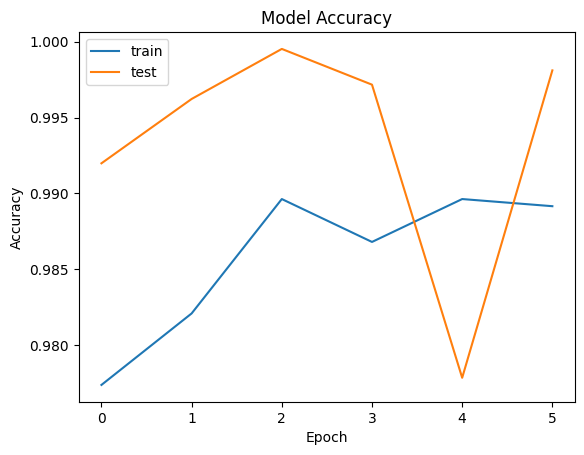

In [17]:
# Train the CNN model and store the training history
history = cnn_model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size1, callbacks=[early_stopping])

# Check the keys in the history dictionary
print(history.history.keys())

# Plot the accuracy from the training history
if 'accuracy' in history.history:
    k = 'accuracy'
elif 'acc' in history.history:
    k = 'acc'

if k:
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
else:
    print("Accuracy not found in history.")


Epoch 1/10
67/67 [==============================] - 85s 1s/step - loss: 0.0341 - accuracy: 0.9863 - precision: 0.9884 - recall: 0.9905 - val_loss: 0.0055 - val_accuracy: 0.9986 - val_precision: 0.9978 - val_recall: 1.0000
Epoch 2/10
67/67 [==============================] - 83s 1s/step - loss: 0.0394 - accuracy: 0.9863 - precision: 0.9884 - recall: 0.9905 - val_loss: 0.0090 - val_accuracy: 0.9976 - val_precision: 0.9964 - val_recall: 1.0000
Epoch 3/10
67/67 [==============================] - 84s 1s/step - loss: 0.0420 - accuracy: 0.9873 - precision: 0.9912 - recall: 0.9891 - val_loss: 0.0104 - val_accuracy: 0.9948 - val_precision: 0.9921 - val_recall: 1.0000
Epoch 4/10
67/67 [==============================] - 84s 1s/step - loss: 0.0472 - accuracy: 0.9849 - precision: 0.9905 - recall: 0.9862 - val_loss: 0.0098 - val_accuracy: 0.9976 - val_precision: 0.9964 - val_recall: 1.0000


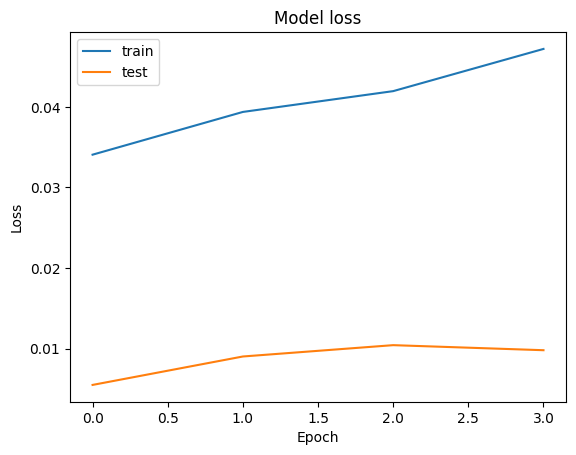

In [19]:
# Train the CNN model and store the training history
history = cnn_model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size1, callbacks=[early_stopping])

# Plot the loss from the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


67/67 [==============================] - 17s 252ms/step


<ipython-input-21-f73ff637f989>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predicted_prob > 0.5)


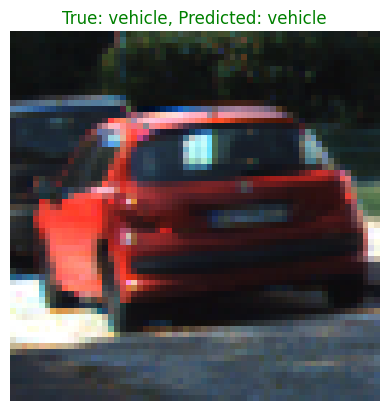

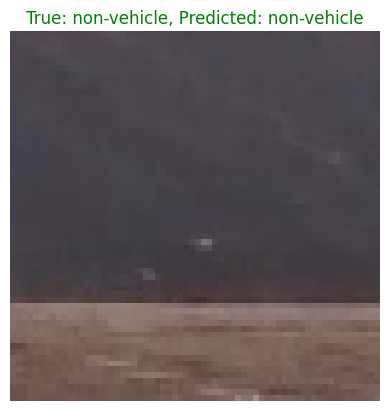

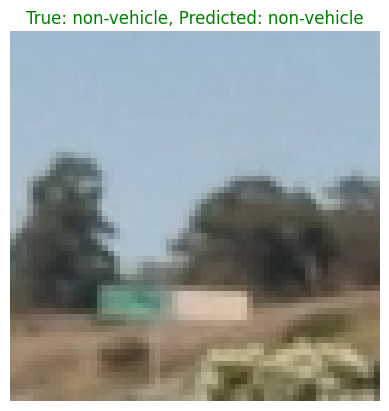

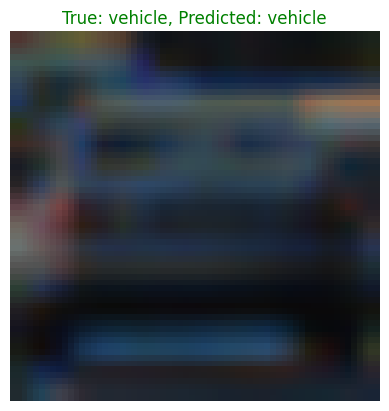

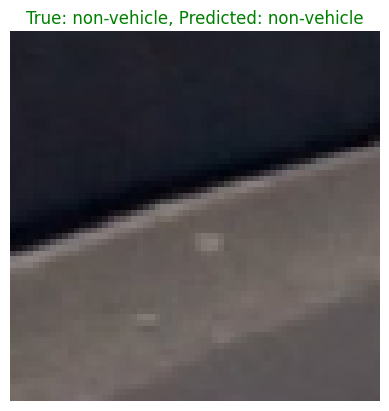

In [21]:
class_labels = {0: 'non-vehicle', 1: 'vehicle'}

# Function to display images with predictions
def visualize_predictions(model, test_data_gen, num_samples=5):
    # Generate predictions for the test set
    predictions = model.predict(test_data_gen)

    # Get the true labels from the test set
    true_labels = test_data_gen.classes

    # Get the class indices (0 or 1)
    class_indices = test_data_gen.class_indices

#     # Get the class labels ('non-vehicle' or 'vehicle')
#     class_labels = {v: k for k, v in class_indices.items()}

    filenames = test_data_gen.filenames

    # Select a random sample of test images
    sample_indices = np.random.choice(len(filenames), num_samples, replace=False)

    # Display the images with predictions
    for i in sample_indices:
        filename = filenames[i]

        # Get the true label
        true_label = class_labels[true_labels[i]]

        # Get the predicted probability and class
        predicted_prob = predictions[i]
        predicted_class = int(predicted_prob > 0.5)
        predicted_label = class_labels[predicted_class]

        # Determine the color for the label (green for correct, red for incorrect)
        label_color = 'green' if true_label == predicted_label else 'red'

        # Load and display the image
        img_path = os.path.join('/content/drive/MyDrive/dataset final/test', filename)
        img = plt.imread(img_path)

        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {predicted_label}', color=label_color)
        plt.axis('off')
        plt.show()

visualize_predictions(cnn_model, test_Image, num_samples=5)

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the kNN classifier
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
)

# Train the kNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.785
Precision: 0.8636363636363636
Recall: 0.7102803738317757


In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the SVM classifier
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0)  # You can adjust the kernel and regularization parameter C as needed
)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.845
Precision: 0.9042553191489362
Recall: 0.794392523364486


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the logistic regression classifier
log_reg_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=1.0)  # You can adjust the regularization parameter C as needed
)

# Train the logistic regression model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.855
Precision: 0.9148936170212766
Recall: 0.8037383177570093


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth of the tree as needed

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.865
Precision: 0.9166666666666666
Recall: 0.822429906542056


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# You can adjust the number of trees (n_estimators) and maximum depth of each tree as needed

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.88
Precision: 0.9368421052631579
Recall: 0.8317757009345794


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load your training and testing data
# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, and y_test

# Define the base estimator (decision tree in this case)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Define the AdaBoost classifier
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
# You can adjust the number of weak learners (n_estimators) as needed

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.87
Precision: 0.900990099009901
Recall: 0.8504672897196262
